<a href="https://colab.research.google.com/github/Navya003/NLP/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 181 kB 55.7 MB/s 
     |████████████████████████████████| 158 kB 55.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 157 kB 54.6 MB/s 
     |████████████████████████████████| 157 kB 56.4 MB/s 
     |████████████████████████████████| 157 kB 59.0 MB/s 
     |████████████████████████████████| 157 kB 58.6 MB/s 
     |████████████████████████████████| 157 kB 38.0 MB/s 
     |████████████████████████████████| 157 kB 40.7 MB/s 
     |████████████████████████████████| 157 kB 65.0 MB/s 
     |████████████████████████████████| 156 kB 33.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=af22f3d056fbb924c55ee20985983312c06898a3fa5e7729e1d87c3a2b555dc4
  Stored in directory: /root/.cache/pip/wheels/3e/31/

In [ ]:
# import the required modules
# improves output by ignoring warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
# Bayesian optimization
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
#import wandb

BASE MODEL
Accuracy: 81.82%
Classification report:

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        29
         1.0       0.88      0.78      0.83        37

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

Confusion matrix:
 [[25  4]
 [ 8 29]]
Confusion matrix plot:



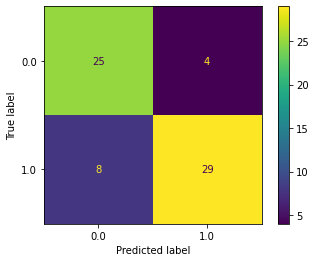

In [ ]:
# RF classification model
# wandb
#wandb.init(project='RF sweeps')

# data
# loaded the dna2vec word embedding file data
# opened and read the respective files
f_pos=open('Positive.w2v','r')
f_neg=open('Negative.w2v','r')
file_p=f_pos.read()
file_n=f_neg.read()
# took file content as a list of sequences
# seperated by newline according to the indexing
lis_p=[x.split() for x in file_p.split('\n')[1:100]]
lis_n=[x.split() for x in file_n.split('\n')[1:100]]
# converted the sequence values(string) into numerical values(float)
list_p=[[float(x) for x in y[1:]] for y in lis_p]
list_n=[[float(x) for x in y[1:]] for y in lis_n]
# labelled natural sequence embeddings as 1
l_pos=[x+[1] for x in list_p]
# labelled synthetic sequence embeddings as 0
l_neg=[x+[0] for x in list_n]
# merged both the lists together
l_whole = l_pos+l_neg
# converted the list to arrray for model implementation
dataset = np.array([np.array(x) for x in l_whole])

# split data into X and Y
# sequence embeddings
X = dataset[:,:-1]
# label of sequence embeddings
Y = dataset[:,-1]

# split the data into train and test using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# test_size defines test data to be split from train data

# RF classifier model
# used with 1000 decision trees instead of 100(default value)
classifier=RandomForestClassifier(n_estimators=1000)

# fit the training data into the model
classifier.fit(x_train, y_train)

# predicted values from the model
y_pred=classifier.predict(x_test)
y_probas =classifier.predict_proba(x_test)

#wandb.log({'accuracy': accuracy_score(y_test, y_pred)})

# accuracy prediction
accuracy = accuracy_score(y_test, y_pred)
print("BASE MODEL")
print("Accuracy: %.2f%%" % (accuracy * 100.0))


# classification report
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
conf=confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf)

# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()


In [ ]:
import shap
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap_values

[array([[ 2.22061804e-03, -5.31521095e-04,  4.40315264e-03, ...,
         -3.63869540e-03,  1.25176790e-03, -2.33850569e-03],
        [-6.82941167e-04,  1.75183701e-03, -6.45576470e-03, ...,
          1.92338774e-04, -4.51613747e-03, -1.89253652e-03],
        [ 1.18561091e-03,  3.53159021e-03, -4.60081363e-03, ...,
          5.64172550e-04,  1.59994531e-03,  4.81078710e-04],
        ...,
        [ 5.17011642e-05,  4.40322415e-04, -7.53902016e-03, ...,
          1.02032429e-03,  4.21959745e-04,  2.22013829e-03],
        [ 1.44317052e-04, -6.13430769e-03,  3.94923965e-03, ...,
          2.56244379e-03, -6.23235466e-04, -5.92607946e-04],
        [ 4.38726812e-04,  1.56830931e-03, -1.06519442e-02, ...,
         -1.70008118e-03,  1.26611299e-03, -1.57904674e-03]]),
 array([[-2.22061804e-03,  5.31521095e-04, -4.40315264e-03, ...,
          3.63869540e-03, -1.25176790e-03,  2.33850569e-03],
        [ 6.82941167e-04, -1.75183701e-03,  6.45576470e-03, ...,
         -1.92338774e-04,  4.51613747e

In [ ]:
l=shap_values[0]
len(l)

66

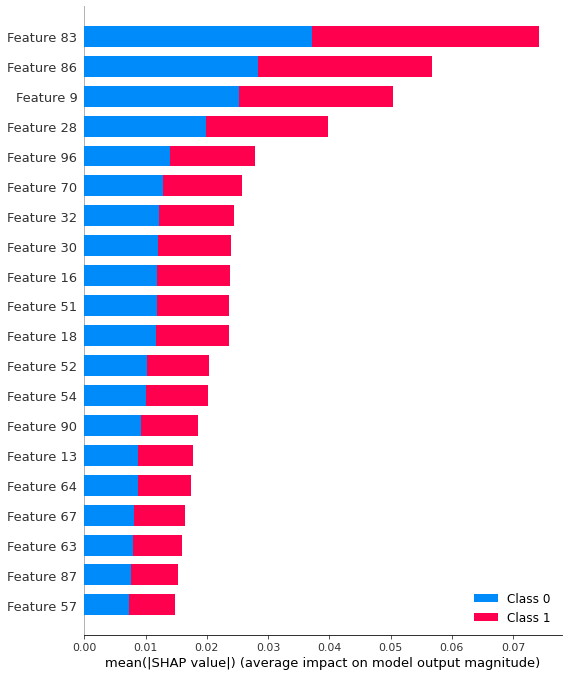

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
len(classifier.feature_importances_)

100

In [ ]:
# parameters cuurently used
print('Parameters currently in use:')
pprint(classifier.get_params())

Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}



GRID SEARCH MODEL
Range of parameters used for hyperparameter tuning:
{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [1000, 2000, 3000, 4000, 5000]}
Fitting 3 folds for each of 900 candidates, totalling 2700 fits
Best parameter values:
{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 4000}
Accuracy: 75.76%
Classification report:

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        29
         1.0       0.88      0.78      0.83        37

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

Confusion matrix
 [[25  4]
 [12 25]]
Confusion matrix plot:



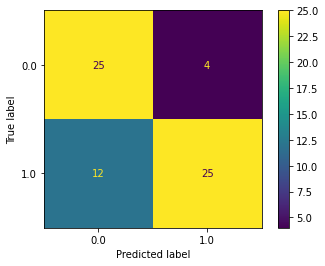

In [ ]:
# Hyperparameter tuning using GridsearchCV
# Setting range of parameters
# Number of trees in random forest
n_estimators = [1000, 2000, 3000, 4000, 5000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("\nGRID SEARCH MODEL")
print('Range of parameters used for hyperparameter tuning:')
pprint(param)
# implemented grid search on RF classifier
classifier_grid=GridSearchCV(estimator=classifier, param_grid=param, cv = 3, verbose=2, n_jobs = 4)
# fit the training data
classifier_grid.fit(x_train,y_train)

# Best hyperparameter values
print('Best parameter values:')
print(classifier_grid.best_params_)

# predicted values from the grid search model
cl_g=classifier_grid.best_estimator_
pred=cl_g.predict(x_test)
y_probas = cl_g.predict_proba(x_test)

# accuracy prediction for grid search model
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#classification report
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
conf_g=confusion_matrix(y_test, pred)
print("Confusion matrix\n", conf_g)

# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(cl_g, x_test, y_test)
plt.show()

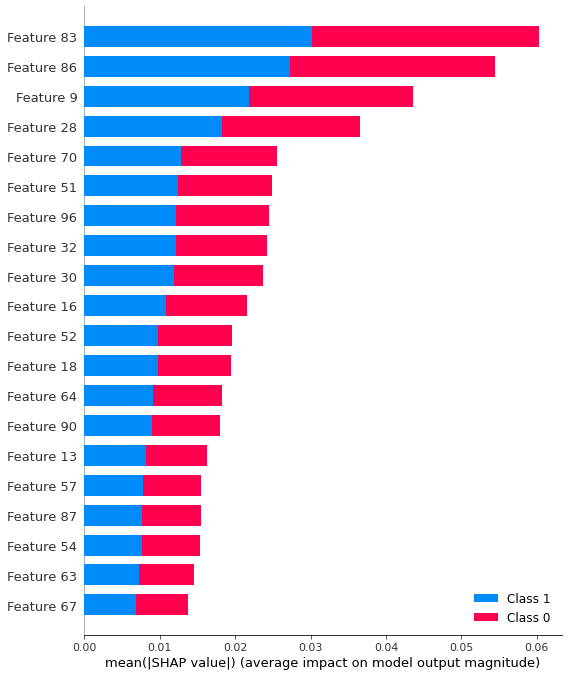

In [ ]:
explainer = shap.TreeExplainer(cl_g)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")


RANDOM SEARCH MODEL
Range of parameters used for hyperparameter tuning:
{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [1000, 2000, 3000, 4000, 5000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameter values:
{'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
Accuracy: 75.76%
Classification report:

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81        29
         1.0       0.88      0.78      0.83        37

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

Confusion matrix
 [[25  4]
 [12 25]]
Confusion matrix plot:



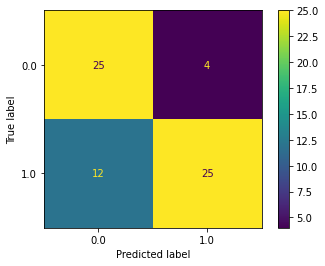

In [ ]:
# Random search implementation
# Module for hyperparameter tuning
# Hyperparameter tuning using RandomizedsearchCV
# Setting range of parameters
# Number of trees in random forest
n_estimators = [1000, 2000, 3000, 4000, 5000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("\nRANDOM SEARCH MODEL")
print('Range of parameters used for hyperparameter tuning:')
pprint(param)

# implemented grid search on RF classifier
classifier_random=RandomizedSearchCV(estimator = classifier, param_distributions = param, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# fit the training data in the randomized model
classifier_random.fit(x_train, y_train)

# Best hyperparameter values
print('Best parameter values:')
print(classifier_random.best_params_)

# predicted values from the random search model using best parameters
cl_r=classifier_random.best_estimator_
pred=cl_r.predict(x_test)
y_probas = cl_r.predict_proba(x_test)

# accuracy prediction for random search model
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#classification report
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
conf_r=confusion_matrix(y_test, pred)
print("Confusion matrix\n", conf_r)

# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(cl_r, x_test, y_test)
plt.show()

Text(0.5, 0, 'RF feature Importance ')

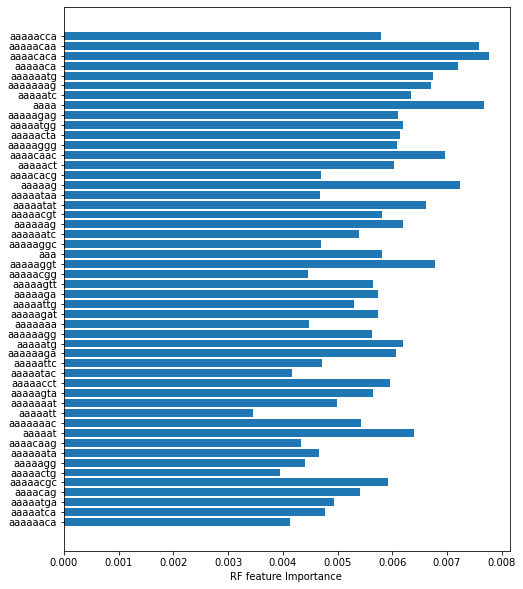

In [ ]:
#Random Search
import pandas as pd

pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
df = pd.concat([pos, neg])
#df.iloc[:,:0]
# this converts the index (ie k-mers) into a list
p=pos.index.tolist()
n=neg.index.tolist()
posd=pos.index
negd=neg.index
whole=posd.append(negd)
kmer=list(whole)

# use countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load the text data
corpus=kmer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

# step 2
feature_name=np.array(features)

# step 3
sorted_idx = cl_r.feature_importances_.argsort()#[::-1]
#feature_name = [feature_name[i] for i in sorted_idx]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")


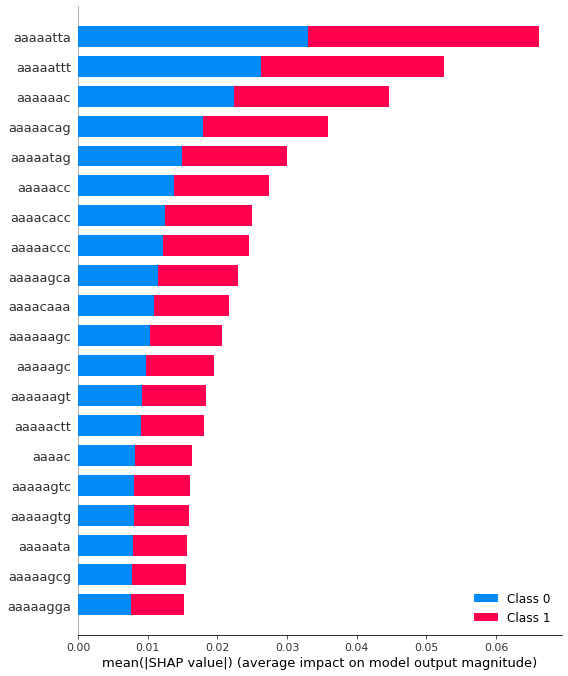

In [ ]:
explainer = shap.TreeExplainer(cl_r)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feature_name)


BAYESIAN OPTIMIZATION
100%|██████████| 80/80 [07:41<00:00,  5.77s/it, best loss: -0.8478632478632478]
Best parameters:
entropy
sqrt
1500
Accuracy: 72.73%
Classification report:

              precision    recall  f1-score   support

         0.0       0.65      0.83      0.73        29
         1.0       0.83      0.65      0.73        37

    accuracy                           0.73        66
   macro avg       0.74      0.74      0.73        66
weighted avg       0.75      0.73      0.73        66

Confusion matrix:
 [[24  5]
 [13 24]]
Confusion matrix plot:



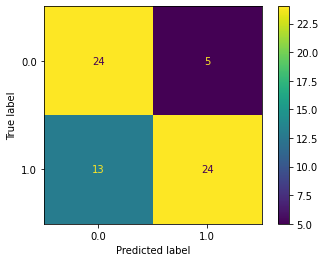

In [ ]:
# Bayesian optimization
print("\nBAYESIAN OPTIMIZATION")
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }
def objective(space):
   model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'],
                                 )
   #5 times cross validation fives 5 accuracies=>mean of these accuracies will be considered
   accuracy = cross_val_score(model, x_train, y_train, cv = 5).mean()
   # We aim to maximize accuracy, therefore we return it as a negative value
   return {'loss': -accuracy, 'status': STATUS_OK }

from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}
print("Best parameters:")
print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])
rf_bayesian=RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'],
                                       max_features = feat[best['max_features']],
                                       min_samples_leaf = best['min_samples_leaf'],
                                       min_samples_split = best['min_samples_split'],
                                       n_estimators = est[best['n_estimators']]).fit(x_train,y_train)
pred_b=rf_bayesian.predict(x_test)
y_probas = rf_bayesian.predict_proba(x_test)
# accuracy prediction
accuracy = accuracy_score(y_test, pred_b)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# classification report
print("Classification report:\n")
print(classification_report(y_test, pred_b))

# confusion matrix
conf=confusion_matrix(y_test, pred_b)
print("Confusion matrix:\n", conf)

# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(rf_bayesian, x_test, y_test)
plt.show()





Text(0.5, 0, 'RF feature Importance ')

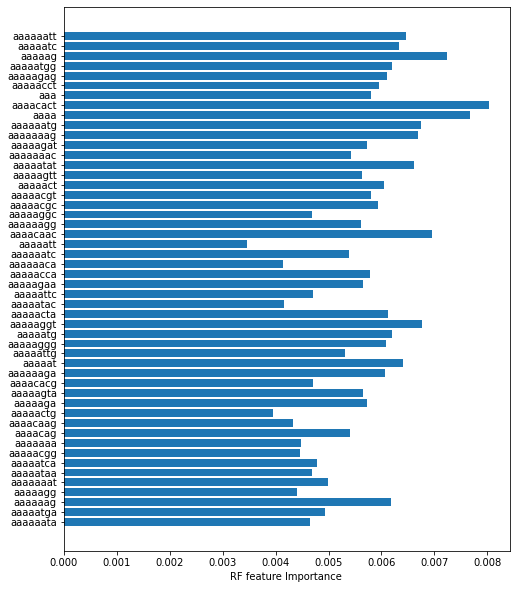

In [ ]:
# Bayesian search
import pandas as pd

pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
df = pd.concat([pos, neg])
#df.iloc[:,:0]
# this converts the index (ie k-mers) into a list
p=pos.index.tolist()
n=neg.index.tolist()
posd=pos.index
negd=neg.index
whole=posd.append(negd)
kmer=list(whole)

# use countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load the text data
corpus=kmer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

# step 2
feature_name=np.array(features)

# step 3
sorted_idx = rf_bayesian.feature_importances_.argsort()#[::-1]
#feature_name = [feature_name[i] for i in sorted_idx]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")


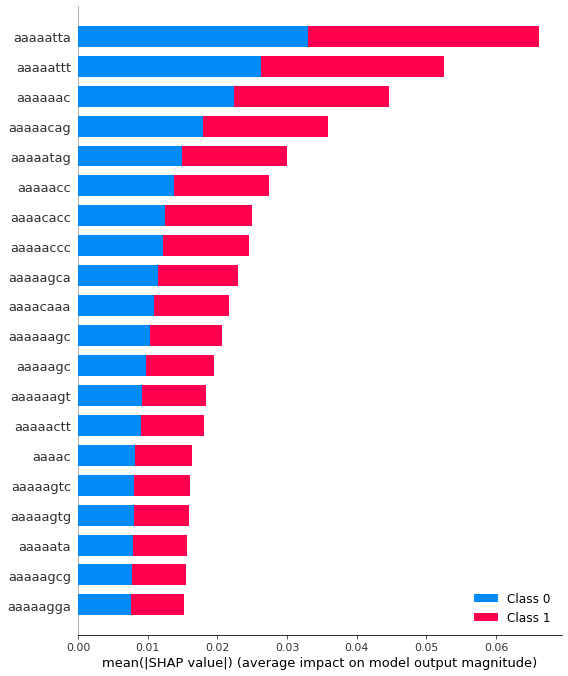

In [ ]:
explainer = shap.TreeExplainer(cl_r)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feature_name)

In [ ]:

# Weights and biases
import wandb
wandb.init(project="RF classifier", name="RF-base model")
# Feature importance
wandb.sklearn.plot_feature_importances(classifier)
# metrics summary
wandb.sklearn.plot_summary_metrics(classifier, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(classifier, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(classifier, X, Y, 'RandomForestClassifier- Base model')
#confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


In [ ]:
import wandb
wandb.init(project="RF classifier", name="RF-gridsearch model")
# Feature importance
wandb.sklearn.plot_feature_importances(cl_g)
# metrics summary
wandb.sklearn.plot_summary_metrics(cl_g, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(cl_g, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(cl_g, X, Y, 'RandomForestClassifier-Grid search model')
# confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


In [ ]:
wandb.init(project="RF classifier", name="RF-random search model")
# Feature importance
wandb.sklearn.plot_feature_importances(cl_r)
# metrics summary
wandb.sklearn.plot_summary_metrics(cl_r, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(cl_r, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(cl_r, X, Y, 'RandomForestClassifier-Random search model')
# confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)

In [ ]:
wandb.init(project="RF classifier", name="RF-Bayesian optimization model")
# Feature importance
wandb.sklearn.plot_feature_importances(model=rf_bayesian, title="RF-Bayesian model")
# metrics summary
wandb.sklearn.plot_summary_metrics(rf_bayesian, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(rf_bayesian, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(rf_bayesian, X, Y, 'RandomForestClassifier-Bayesian optimization model')
# confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)

In [ ]:
# Exporting metrics from a project in to a CSV file
import pandas as pd
import wandb
api = wandb.Api()
entity, project = "tyagilab", "RF classifier"  # set to your entity and project
runs = api.runs(entity + "/" + project)

summary_list, config_list, name_list = [], [], []
for run in runs:
    # .summary contains the output keys/values for metrics like accuracy.
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### Plotting Feature importance from RF Model

1.   step 1: Vectorize the k-mer data using countvectorizer- these preserves the k-mer names.
2.   step 2: Use feature imp. fxn. to select top features sorted by their index.
3.   step 3: Use feature names from step 1 and imp features from step 2 to plot.






Text(0.5, 0, 'RF feature Importance ')

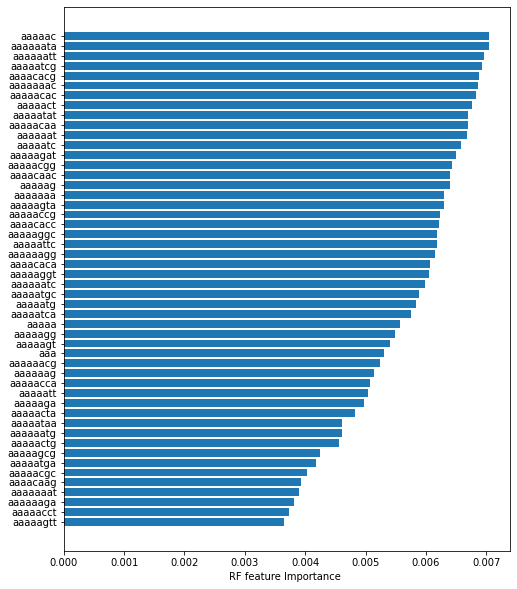

In [ ]:
# Rf base model
#step 1
# read data in a form where k-mer name are still preserved
import pandas as pd

pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
df = pd.concat([pos, neg])
#df.iloc[:,:0]
# this converts the index (ie k-mers) into a list
p=pos.index.tolist()
n=neg.index.tolist()
posd=pos.index
negd=neg.index
whole=posd.append(negd)
kmer=list(whole)

# use countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load the text data
corpus=kmer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

# step 2
feature_name=np.array(features)

# step 3
sorted_idx = classifier.feature_importances_.argsort()#[::-1]
#feature_name = [feature_name[i] for i in sorted_idx]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")


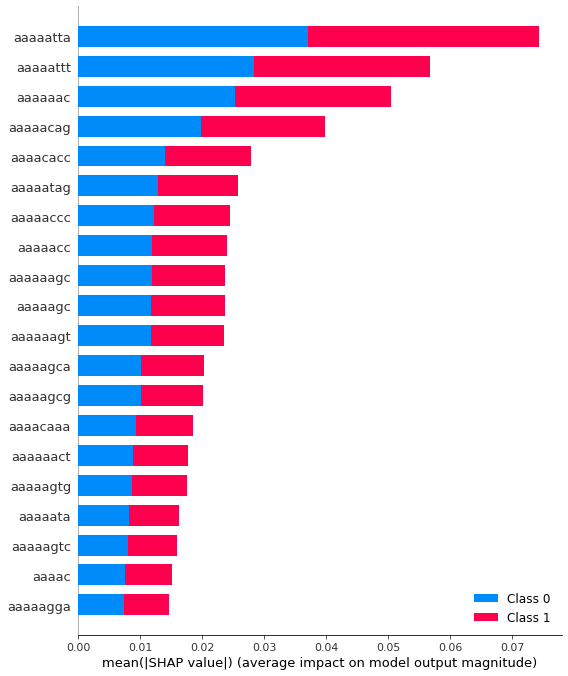

In [ ]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feature_name)

In [ ]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_name = [feature_name[i] for i in indices]
feats=np.array(feature_name)
#print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d - %s : %f" % (f+1, indices[f], feats[f], importances[indices[f]]))
    #print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_name, importances[indices[f]]))

1. feature 83 - aaaaatta : 0.043892
2. feature 52 - aaaaagca : 0.042664
3. feature 64 - aaaaagtg : 0.035013
4. feature 86 - aaaaattt : 0.034340
5. feature 11 - aaaaaacc : 0.027154
6. feature 13 - aaaaaact : 0.026280
7. feature 28 - aaaaacag : 0.025958
8. feature 9 - aaaaaac : 0.022606
9. feature 63 - aaaaagtc : 0.020602
10. feature 59 - aaaaaggg : 0.019748
11. feature 16 - aaaaaagc : 0.016947
12. feature 3 - aaaaaa : 0.016508
13. feature 57 - aaaaagga : 0.016421
14. feature 81 - aaaaatgt : 0.015709
15. feature 51 - aaaaagc : 0.015575
16. feature 18 - aaaaaagt : 0.015073
17. feature 66 - aaaaat : 0.014537
18. feature 53 - aaaaagcc : 0.013170
19. feature 48 - aaaaagac : 0.013060
20. feature 70 - aaaaatag : 0.012180
21. feature 30 - aaaaacc : 0.011456
22. feature 1 - aaaa : 0.010978
23. feature 10 - aaaaaaca : 0.010852
24. feature 32 - aaaaaccc : 0.010775
25. feature 93 - aaaacaat : 0.010512
26. feature 42 - aaaaactc : 0.010473
27. feature 67 - aaaaata : 0.010450
28. feature 99 - aaaacag 

Text(0.5, 0, 'RF feature Importance ')

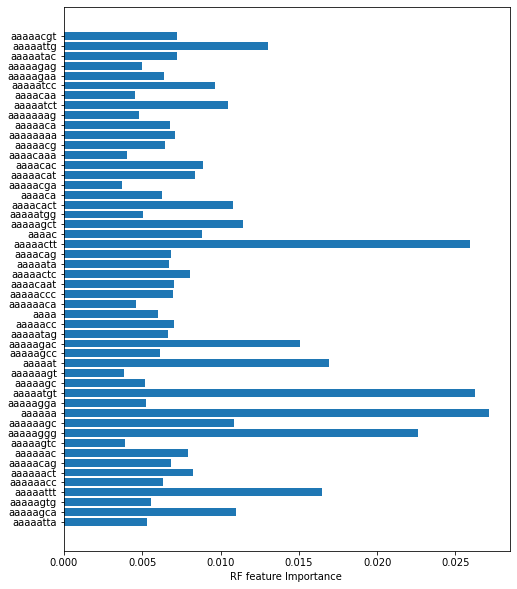

In [ ]:
plt.figure(figsize=(8,10))
plt.barh(feats[:50], importances[:50])
plt.xlabel("RF feature Importance ")

Text(0.5, 0, 'RF feature Importance ')

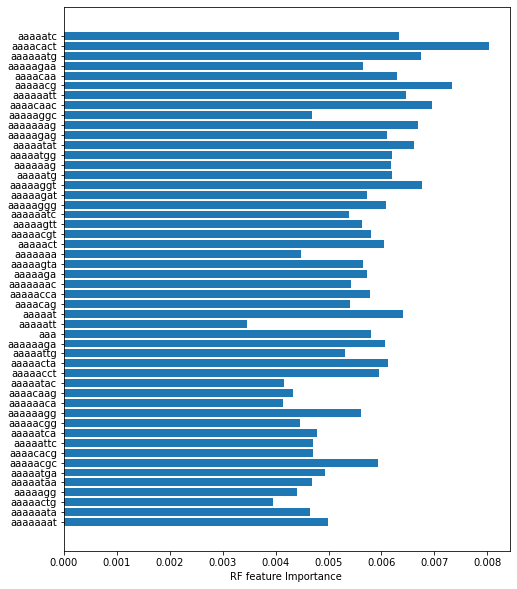

In [ ]:
#Grid Search
import pandas as pd

pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
df = pd.concat([pos, neg])
#df.iloc[:,:0]
# this converts the index (ie k-mers) into a list
p=pos.index.tolist()
n=neg.index.tolist()
posd=pos.index
negd=neg.index
whole=posd.append(negd)
kmer=list(whole)

# use countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load the text data
corpus=kmer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

# step 2
feature_name=np.array(features)

# step 3
sorted_idx = cl_g.feature_importances_.argsort()#[::-1]
#feature_name = [feature_name[i] for i in sorted_idx]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")


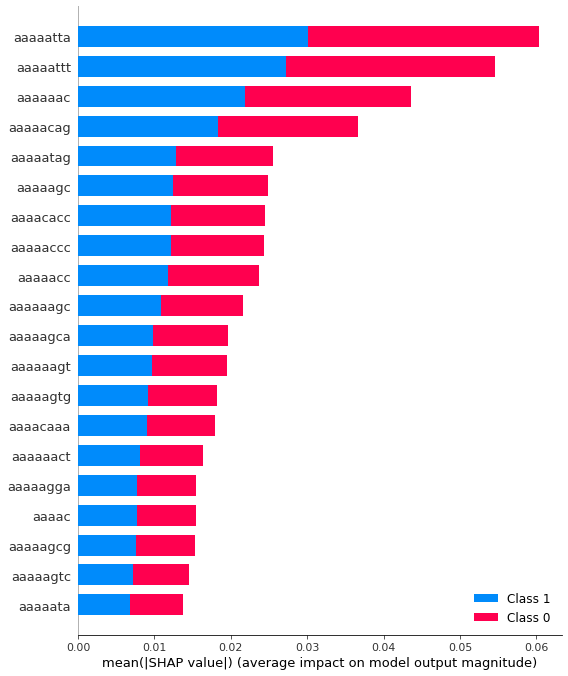

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feature_name)

Text(0.5, 0, 'index of the feature')

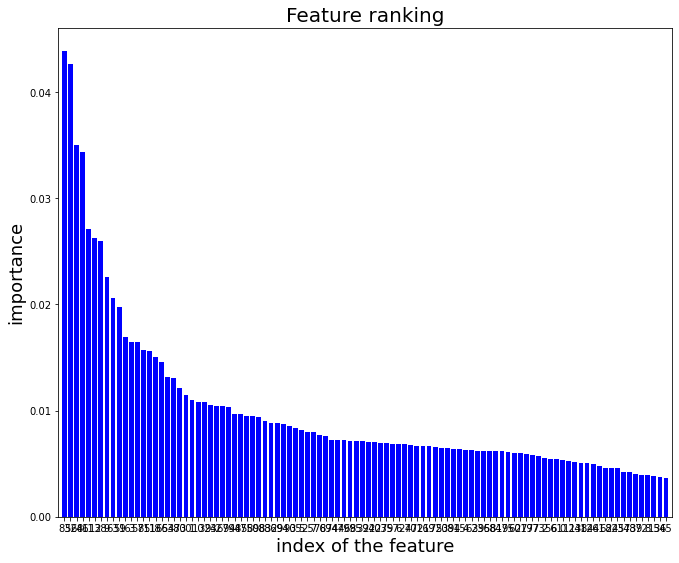

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x_train.shape[1]), importances[indices],
    color="b",
    align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

In [ ]:
importances

array([0.00530878, 0.01097777, 0.00557041, 0.01650815, 0.00629769,
       0.0082169 , 0.0068568 , 0.00794429, 0.00389357, 0.02260552,
       0.01085164, 0.02715445, 0.00524252, 0.02627969, 0.00514562,
       0.00381936, 0.01694686, 0.00615396, 0.01507255, 0.00667557,
       0.00703632, 0.00597644, 0.00460176, 0.00695911, 0.00704036,
       0.00802315, 0.00669267, 0.00682754, 0.02595794, 0.00884516,
       0.01145647, 0.00507638, 0.01077489, 0.00623399, 0.00373354,
       0.00837448, 0.0088651 , 0.00403554, 0.00643554, 0.00711828,
       0.00676698, 0.00481782, 0.01047293, 0.00456062, 0.00964932,
       0.00640359, 0.0049727 , 0.00720472, 0.01305984, 0.00719019,
       0.00649007, 0.01557545, 0.04266445, 0.01317016, 0.00423745,
       0.00953133, 0.00548167, 0.01642104, 0.00618824, 0.01974824,
       0.00604825, 0.00540989, 0.00629105, 0.02060237, 0.03501288,
       0.00365365, 0.01453669, 0.0104495 , 0.00460411, 0.00715535,
       0.01217978, 0.00670078, 0.00658557, 0.00575131, 0.00726

In [ ]:
indices

array([83, 52, 64, 86, 11, 13, 28,  9, 63, 59, 16,  3, 57, 81, 51, 18, 66,
       53, 48, 70, 30,  1, 10, 32, 93, 42, 67, 99, 44, 87, 55, 80, 98, 88,
       36, 29, 94, 90, 35,  5, 25,  7, 76, 89, 74, 47, 49, 69, 85, 39, 24,
       20, 23, 75, 97,  6, 27, 40, 71, 26, 19, 72, 50, 38, 91, 45,  4, 62,
       33, 96, 58, 84, 17, 95, 60, 21, 79, 77, 73,  2, 56, 61,  0, 12, 14,
       31, 82, 46, 41, 68, 22, 43, 54, 78, 37, 92,  8, 15, 34, 65])

In [ ]:
feats

array(['aaaaatta', 'aaaaagca', 'aaaaagtg', 'aaaaattt', 'aaaaaacc',
       'aaaaaact', 'aaaaacag', 'aaaaaac', 'aaaaagtc', 'aaaaaggg',
       'aaaaaagc', 'aaaaaa', 'aaaaagga', 'aaaaatgt', 'aaaaagc',
       'aaaaaagt', 'aaaaat', 'aaaaagcc', 'aaaaagac', 'aaaaatag',
       'aaaaacc', 'aaaa', 'aaaaaaca', 'aaaaaccc', 'aaaacaat', 'aaaaactc',
       'aaaaata', 'aaaacag', 'aaaaactt', 'aaaac', 'aaaaagct', 'aaaaatgg',
       'aaaacact', 'aaaaca', 'aaaaacga', 'aaaaacat', 'aaaacac',
       'aaaacaaa', 'aaaaacg', 'aaaaaaaa', 'aaaaaca', 'aaaaaaag',
       'aaaaatct', 'aaaacaa', 'aaaaatcc', 'aaaaagaa', 'aaaaagag',
       'aaaaatac', 'aaaaattg', 'aaaaacgt', 'aaaaac', 'aaaaaata',
       'aaaaaatt', 'aaaaatcg', 'aaaacacg', 'aaaaaaac', 'aaaaacac',
       'aaaaact', 'aaaaatat', 'aaaaacaa', 'aaaaaat', 'aaaaatc',
       'aaaaagat', 'aaaaacgg', 'aaaacaac', 'aaaaag', 'aaaaaaa',
       'aaaaagta', 'aaaaaccg', 'aaaacacc', 'aaaaaggc', 'aaaaattc',
       'aaaaaagg', 'aaaacaca', 'aaaaaggt', 'aaaaaatc', 'aaaaatgc',
 

In [ ]:
feature_name = [feature_name[i] for i in indices]
feature_name

['aaaaaacg',
 'aaaaaatt',
 'aaaacaac',
 'aaaaatt',
 'aaaaaa',
 'aaaaatgt',
 'aaaaactt',
 'aaaaaggg',
 'aaaaacgg',
 'aaaaacaa',
 'aaaaat',
 'aaaaattt',
 'aaaaact',
 'aaaaagt',
 'aaaaaata',
 'aaaaagac',
 'aaaaaaa',
 'aaaaatcg',
 'aaaaattg',
 'aaaaaggc',
 'aaaaagct',
 'aaaaagca',
 'aaaaaagc',
 'aaaacact',
 'aaaaatga',
 'aaaaatct',
 'aaaaagta',
 'aaaaagtt',
 'aaaaatcc',
 'aaaaaga',
 'aaaaaaac',
 'aaaaagg',
 'aaaaacct',
 'aaaaacta',
 'aaaacac',
 'aaaac',
 'aaaaacgc',
 'aaaaaatg',
 'aaaaacat',
 'aaaaaact',
 'aaaaactc',
 'aaaaaac',
 'aaaaatgc',
 'aaaaataa',
 'aaaaaggt',
 'aaaaatac',
 'aaaaacgt',
 'aaaacacc',
 'aaaaacca',
 'aaaaaaaa',
 'aaaacaat',
 'aaaaacc',
 'aaaaaccc',
 'aaaaaatc',
 'aaaaaaga',
 'aaaaacag',
 'aaaacag',
 'aaaaaca',
 'aaaaattc',
 'aaaaata',
 'aaaaatag',
 'aaaaaagg',
 'aaaaac',
 'aaaaacg',
 'aaaaactg',
 'aaaaagaa',
 'aaaaaacc',
 'aaaaagat',
 'aaaaca',
 'aaaaaaat',
 'aaaaatat',
 'aaaaaag',
 'aaaaagcc',
 'aaaacaag',
 'aaaaaat',
 'aaaa',
 'aaaaa',
 'aaaaatg',
 'aaaacaca',
 'aaaaa

In [ ]:
len(feature_name)

100

In [ ]:
importance=classifier.feature_importances_
len(importance)

100

<BarContainer object of 10 artists>

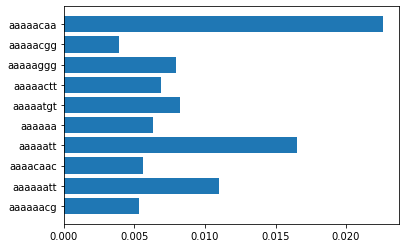

In [ ]:
plt.barh(feature_name[:10], importance[:10])

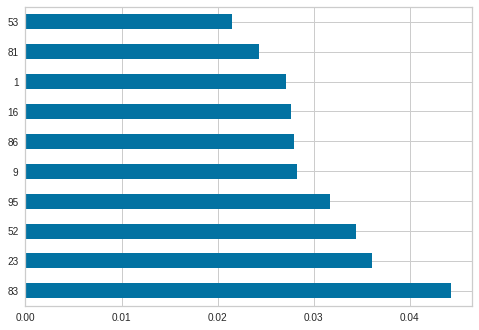

In [ ]:
feature_scores = pd.Series(classifier.feature_importances_).sort_values(ascending=False)

feature_scores.nlargest(10).plot(kind='barh')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc5f48c5fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc5f4f59750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc5f4f6db50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc5f4f01c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc5f3f67650>],
 'means': []}

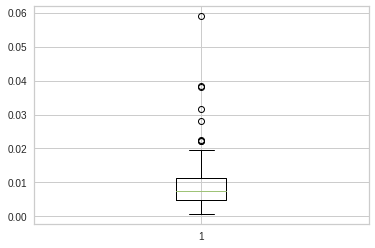

In [ ]:
plt.boxplot(feature_scores)

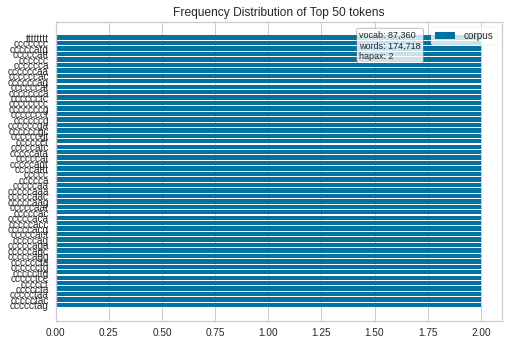

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

corpus=whole
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h')
visualizer.fit(docs)
visualizer.show()

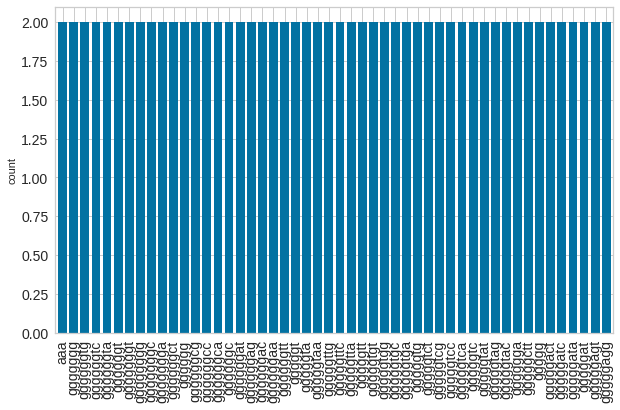

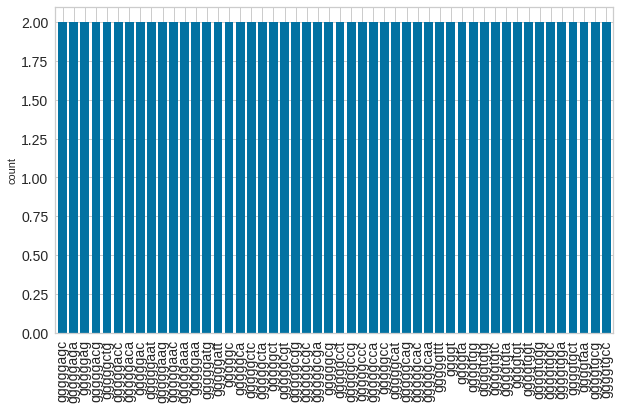

In [ ]:
#Boxplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#k-mer data
posd = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
negd = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
# this converts the index (ie k-mers) into a list
posd.index.tolist()
negd.index.tolist()
p_d=posd.index
n_d=negd.index
whole=p_d.append(n_d)

# Load the text data
corpus=whole

# use countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

docs=vect.fit(corpus)

neg_doc_matrix = vect.transform(p_d)
pos_doc_matrix = vect.transform(n_d)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

vect._validate_vocabulary()
term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

#Create a series from the sparse matrix
d = pd.Series(term_freq_df.total,
              index = term_freq_df.index).sort_values(ascending=False)
ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()
ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()

In [ ]:
import pandas as pd
pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
# this converts the index (ie k-mers) into a list
p=pos.index.tolist()
n=neg.index.tolist()
posd=pos.index
negd=neg.index


In [ ]:
df = pd.concat([pos, neg])
df.iloc[:,:0]

""
0
AAA
TTT
ATT
AAT
TAT
...
GCACATCA
TGGAATCC
TCCCTTTG


In [ ]:
pos.iloc[:,:0]

""
0
AAA
TTT
ATT
AAT
TAT
...
GAAGTGG
GCAATCT
TGTTTTTC


In [ ]:
negd

Index(['AAT', 'ATT', 'ATA', 'TAT', 'AAA', 'TTT', 'TTA', 'TAA', 'TGA', 'TCA',
       ...
       'TGACACGA', 'CTACGACA', 'TTAGGCAA', 'TTCTCGCA', 'TTTACGCA', 'AGGGCCC',
       'CTGTGGAT', 'CGTATAGT', 'ACCACCAA', 'CTTCCAGA'],
      dtype='object', name=0, length=48437)

In [ ]:
#pd.join(nd, how='right')
posd.append(negd)
#pd.join(nd, how='outer')


Index(['AAA', 'TTT', 'ATT', 'AAT', 'TAT', 'ATA', 'GAA', 'TTC', 'TAA', 'TTA',
       ...
       'TGACACGA', 'CTACGACA', 'TTAGGCAA', 'TTCTCGCA', 'TTTACGCA', 'AGGGCCC',
       'CTGTGGAT', 'CGTATAGT', 'ACCACCAA', 'CTTCCAGA'],
      dtype='object', name=0, length=96873)

In [ ]:
kmer=list(whole)
kmer[0:10]

['AAA', 'TTT', 'ATT', 'AAT', 'TAT', 'ATA', 'GAA', 'TTC', 'TAA', 'TTA']

Accuracy: 63.64%
Classification report:

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        18
         1.0       0.60      0.60      0.60        15

    accuracy                           0.64        33
   macro avg       0.63      0.63      0.63        33
weighted avg       0.64      0.64      0.64        33

Confusion matrix
 [[12  6]
 [ 6  9]]
Confusion matrix plot:



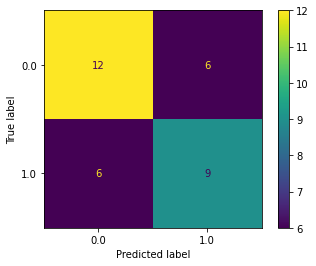

In [ ]:
# RF classification model
# improves output by ignoring warnings
import warnings
warnings.filterwarnings('ignore')
# import all the required modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# data
# loaded the dna2vec word embedding file data
# opened and read the respective files
def load_data(filename,mode by):
  file=open(filename, mode)
  file_r=file.read()
  # took file content as a list of sequences
  # seperated by newline according to the indexing
  list_seq=[x.split() for x in file_r.split('\n')[1:50]]
  # converted the sequence values(string) into numerical values(float)
  list_float=[[float(x) for x in y[1:]] for y in list_seq]
  return list_float

list_p=load_data('Positive.w2v','r')
list_n=load_data('Negative.w2v','r')
# labelled natural sequence embeddings as 1
l_pos=[x+[1] for x in list_p]
# labelled synthetic sequence embeddings as 0
l_neg=[x+[0] for x in list_n]
# merged both the lists together
l_whole = l_pos+l_neg
# converted the list to arrray for model implementation
dataset = np.array([np.array(x) for x in l_whole])

# split data into X and Y
# sequence embeddings
X = dataset[:,:-1]
# label of sequence embeddings
Y = dataset[:,-1]

# split the data into train and test using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# test_size defines test data to be split from train data
# 1/3rd of dataset(training) is used as test dataset

# RF classifier model
# called with default values
classifier=RandomForestClassifier()

# fit the training data into the base model
classifier.fit(x_train, y_train)

# predicted values from the model
y_pred=classifier.predict(x_test)

# accuracy prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# classification report
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
conf=confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", conf)


# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(classifier, x_test, y_test)



In [ ]:
dataset

array([[ 0.01691546,  0.32283467,  0.13115035, ...,  0.02115679,
         0.18403837,  1.        ],
       [-0.10909596, -0.03720708,  0.06640811, ...,  0.14560036,
        -0.11447029,  1.        ],
       [-0.09061303,  0.11359508,  0.03104233, ..., -0.12705897,
        -0.08650643,  1.        ],
       ...,
       [-0.09733769,  0.2856911 ,  0.05270001, ...,  0.22157972,
        -0.06166094,  0.        ],
       [ 0.06568917,  0.36166537, -0.06157466, ..., -0.11051125,
         0.14913957,  0.        ],
       [-0.03497048,  0.6057501 ,  0.2289247 , ...,  0.03821858,
         0.07396203,  0.        ]])

In [ ]:
X

array([[ 0.01691546,  0.32283467,  0.13115035, ..., -0.24915493,
         0.02115679,  0.18403837],
       [-0.10909596, -0.03720708,  0.06640811, ..., -0.13075614,
         0.14560036, -0.11447029],
       [-0.09061303,  0.11359508,  0.03104233, ...,  0.16900215,
        -0.12705897, -0.08650643],
       ...,
       [-0.09733769,  0.2856911 ,  0.05270001, ...,  0.15907061,
         0.22157972, -0.06166094],
       [ 0.06568917,  0.36166537, -0.06157466, ..., -0.33850065,
        -0.11051125,  0.14913957],
       [-0.03497048,  0.6057501 ,  0.2289247 , ..., -0.06391024,
         0.03821858,  0.07396203]])

In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
import os
os.environ['WANDB_NOTEBOOK_NAME'] = 'RF.ipynb'

In [ ]:
sweep_config = {
  "name" : "random",
  "method" : "random",
  "parameters" : {
    "n_estimators" : {
      "values" : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    "max_depth" :{
      "values": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
    },
    "min_samples_leaf":{
        "values":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
    },
    "min_samples_split":{
        "values":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    "epochs":{
        "values":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }
  }
}

sweep_id = wandb.sweep(sweep_config, project="bio")

Create sweep with ID: 9nt229qa
Sweep URL: https://wandb.ai/tyagilab/bio/sweeps/9nt229qa


In [ ]:
def train():
    with wandb.init(project="bio") as run:
        config = wandb.config
        clf =RandomForestClassifier(config)
        for epoch in range(config["epochs"]):
            loss = clf.fit(x_train, y_train)  # your model training code here
            wandb.log({"accuracy": accuracy_score, "epoch": epoch})

count = 5
wandb.agent(sweep_id, function=train, count=count)

wandb: Agent Starting Run: tz8x88uk with config:
wandb: 	epochs: 80
wandb: 	max_depth: 60
wandb: 	min_samples_leaf: 100
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 800
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find RF.ipynb.
wandb: Currently logged in as: navya-tyagi (tyagilab). Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Run tz8x88uk errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: ERROR Run tz8x88uk errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: Agent Starting Run: evqz3n9u with config:
wandb: 	epochs: 90
wandb: 	max_depth: 20
wandb: 	min_samples_leaf: 80
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 1200
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find RF.ipynb.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Run evqz3n9u errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: ERROR Run evqz3n9u errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: Agent Starting Run: g8y48cud with config:
wandb: 	epochs: 50
wandb: 	max_depth: 30
wandb: 	min_samples_leaf: 70
wandb: 	min_samples_split: 6
wandb: 	n_estimators: 1200
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find RF.ipynb.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Run g8y48cud errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: ERROR Run g8y48cud errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
Detected 3 failed runs in the first 60 seconds, killing sweep.
wandb: ERROR Detected 3 failed runs in the first 60 seconds, killing sweep.
wandb: To disable this check set WANDB_AGENT_DISABLE_FLAPPING=true


In [ ]:
def parse_fasta(fh):
    fs=[]
    fss=[]
    seq=''
    for ln in fh:
        if ln[0]=='A' or ln[0]=='T' or ln[0]=='G' or ln[0]=='C':
           seq=seq+ln[:-2]
        else:
           fs.append(seq)
           seq=''
    for element in fs:
      if element!='':
        fss.append(element)
      else:
        fss=fss
    return fss

fh=open('Human_promoter_synthetic.fa')
input=parse_fasta(fh)
print(input[0:10])

['CTCCGAACGGACTACACCAAACGCAAATATGACCTGTCCAGGCCGACTAGTGAACCCATATGCTCTGAAAAGCTAACTGCGGCTTTAAGTAATAGTTGGTGAATTAAATAATATAGTGGGATGAAGCAGAAGATCAGACAAGTTTGGATGAGTGTTGCGTATGAAGCTGGTCAGGCAGCTGGTCAGATCCTGACCTTGCTTGAAAGTCAGTGGTGAAATGATAGGAACCTCTAATATACAAGTCCAACTAATGAGCTGCCTTTTGACTCTTAACTTTATAGTTGCTAAAGAGTATTGGGGGGATTTGTCTCATGAGTACTCCAACCAGTGGAAGCACTGGTCACGTTAATGACTGTAGAAGTGCATTCACAAGAAATGAGTAGGCTAAGTGAAAACAGTTAAAGTTATTCTAAGCAACTCATAATTTTATGCTATAAAAGATAGGCCACTAACCAGGACTGCTCACACTAACTGGGGTGTGGATACAGAGTGTGGTATAGGGACTGCTGAATAGCAATGAGGCCTGTGTTGAAACTTTGAATGTGAGATGCTGTTGCTTACTCAACAACGGCGTCTTTCAGCGAAACATAAGATGATGAGGATACTCACTAGCCATGGTATGCATCGAAAGAACATAATGTTACTTTAGGTGGACATCGTTGTCCATGAAGAGAGTCATCTTATGACCCTGAAACATTCTAATAATACGAATTGCTTAAAACTTCACATAGACCACCTCAACGAGACTGTATGAACAAACGGGGTAGTTTTATGCACAGACAGAATATCAAACTGATATACGATTTGCATTCGCAATCTAGCAAATAAGGGTAGACAAGCGCAGGTGTAGACAATTTGAAACCAAGGCAATGCATCAAATTTGTCACTCTGACTGACATGATTACTTAAGAACAGTGTAGGCTCATTCAACCAGAGGTAATCACATTGCACATAGCTATCGGGTTGAGAACGAGGATGGCGACTGTGACACATTTCCA

In [ ]:
#k-mer
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]
def getKmersList(sequences,size):
  seq_list=[]
  for i in range(0,len(sequences)):
    seq_list.append(getKmers(sequences[i],size))
  return seq_list

f=getKmersList(input,3)
print(f[0:10])


[['CTC', 'TCC', 'CCG', 'CGA', 'GAA', 'AAC', 'ACG', 'CGG', 'GGA', 'GAC', 'ACT', 'CTA', 'TAC', 'ACA', 'CAC', 'ACC', 'CCA', 'CAA', 'AAA', 'AAC', 'ACG', 'CGC', 'GCA', 'CAA', 'AAA', 'AAT', 'ATA', 'TAT', 'ATG', 'TGA', 'GAC', 'ACC', 'CCT', 'CTG', 'TGT', 'GTC', 'TCC', 'CCA', 'CAG', 'AGG', 'GGC', 'GCC', 'CCG', 'CGA', 'GAC', 'ACT', 'CTA', 'TAG', 'AGT', 'GTG', 'TGA', 'GAA', 'AAC', 'ACC', 'CCC', 'CCA', 'CAT', 'ATA', 'TAT', 'ATG', 'TGC', 'GCT', 'CTC', 'TCT', 'CTG', 'TGA', 'GAA', 'AAA', 'AAA', 'AAG', 'AGC', 'GCT', 'CTA', 'TAA', 'AAC', 'ACT', 'CTG', 'TGC', 'GCG', 'CGG', 'GGC', 'GCT', 'CTT', 'TTT', 'TTA', 'TAA', 'AAG', 'AGT', 'GTA', 'TAA', 'AAT', 'ATA', 'TAG', 'AGT', 'GTT', 'TTG', 'TGG', 'GGT', 'GTG', 'TGA', 'GAA', 'AAT', 'ATT', 'TTA', 'TAA', 'AAA', 'AAT', 'ATA', 'TAA', 'AAT', 'ATA', 'TAT', 'ATA', 'TAG', 'AGT', 'GTG', 'TGG', 'GGG', 'GGA', 'GAT', 'ATG', 'TGA', 'GAA', 'AAG', 'AGC', 'GCA', 'CAG', 'AGA', 'GAA', 'AAG', 'AGA', 'GAT', 'ATC', 'TCA', 'CAG', 'AGA', 'GAC', 'ACA', 'CAA', 'AAG', 'AGT', 'GTT', 'TTT

In [ ]:
#space after k-mer
def spacings(sequence,size,index):
  initial=''
  for element in getKmersList(sequence,size)[index]:
    initial=initial+element+' '
  return initial[:-1]
spacings(input,3,0)

'CTC TCC CCG CGA GAA AAC ACG CGG GGA GAC ACT CTA TAC ACA CAC ACC CCA CAA AAA AAC ACG CGC GCA CAA AAA AAT ATA TAT ATG TGA GAC ACC CCT CTG TGT GTC TCC CCA CAG AGG GGC GCC CCG CGA GAC ACT CTA TAG AGT GTG TGA GAA AAC ACC CCC CCA CAT ATA TAT ATG TGC GCT CTC TCT CTG TGA GAA AAA AAA AAG AGC GCT CTA TAA AAC ACT CTG TGC GCG CGG GGC GCT CTT TTT TTA TAA AAG AGT GTA TAA AAT ATA TAG AGT GTT TTG TGG GGT GTG TGA GAA AAT ATT TTA TAA AAA AAT ATA TAA AAT ATA TAT ATA TAG AGT GTG TGG GGG GGA GAT ATG TGA GAA AAG AGC GCA CAG AGA GAA AAG AGA GAT ATC TCA CAG AGA GAC ACA CAA AAG AGT GTT TTT TTG TGG GGA GAT ATG TGA GAG AGT GTG TGT GTT TTG TGC GCG CGT GTA TAT ATG TGA GAA AAG AGC GCT CTG TGG GGT GTC TCA CAG AGG GGC GCA CAG AGC GCT CTG TGG GGT GTC TCA CAG AGA GAT ATC TCC CCT CTG TGA GAC ACC CCT CTT TTG TGC GCT CTT TTG TGA GAA AAA AAG AGT GTC TCA CAG AGT GTG TGG GGT GTG TGA GAA AAA AAT ATG TGA GAT ATA TAG AGG GGA GAA AAC ACC CCT CTC TCT CTA TAA AAT ATA TAT ATA TAC ACA CAA AAG AGT GTC TCC CCA CAA AAC ACT CTA TAA AAT

In [ ]:
def sentence_in_list(sequence,size,index):
  sil=[]
  for element in getKmersList(sequence,size)[index]:
    sil.append([element])
  return sil
f=sentence_in_list(input,3,0)
print(f[0:10])

[['CTC'], ['TCC'], ['CCG'], ['CGA'], ['GAA'], ['AAC'], ['ACG'], ['CGG'], ['GGA'], ['GAC']]


In [ ]:
# use countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Load the text data
corpus=f

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()
importance = classifier.feature_importances_

#step 2
feature_name=np.array(features)

sorted_idx = classifier.feature_importances_.argsort()[::-1]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'RF feature Importance ')

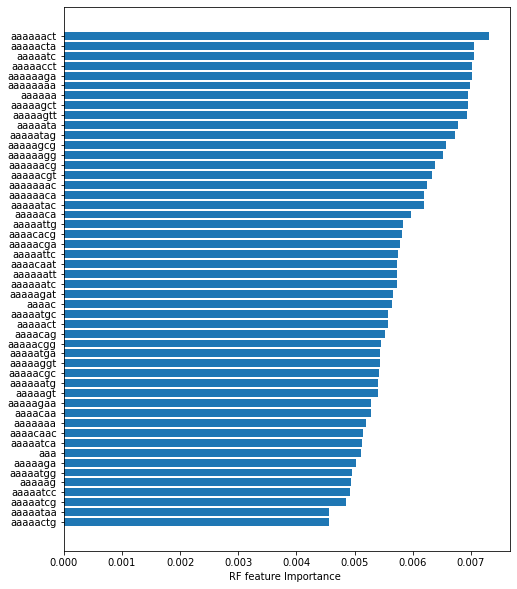

In [ ]:
# Feature importance plot

#step 1: Vectorize the k-mer data using countvectorizer- these preserves the k-mer names.
#step 2: Use feature imp. fxn. to select top features sorted by their index.
#step 3: Use feature names from step 1 and imp features from step 2 to plot.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# loaded the dna2vec word embedding file data
# opened and read the respective files
f_pos=open('Positive.w2v','r')
f_neg=open('Negative.w2v','r')
file_p=f_pos.read()
file_n=f_neg.read()
# took file content as a list of sequences
# seperated by newline according to the indexing
lis_p=[x.split() for x in file_p.split('\n')[1:-1]]
lis_n=[x.split() for x in file_n.split('\n')[1:-1]]
# converted the sequence values(string) into numerical values(float)
list_p=[[float(x) for x in y[1:]] for y in lis_p]
list_n=[[float(x) for x in y[1:]] for y in lis_n]
# labelled natural sequence embeddings as 1
l_pos=[x+[1] for x in list_p]
# labelled synthetic sequence embeddings as 0
l_neg=[x+[0] for x in list_n]
# merged both the lists together
l_whole = l_pos+l_neg
# converted the list to arrray for model implementation
dataset = np.array([np.array(x) for x in l_whole])

# split data into X and Y
# sequence embeddings
X = dataset[:,:-1]
# label of sequence embeddings
Y = dataset[:,-1]

# split the data into train and test using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# test_size defines test data to be split from train data

# RF classifier model
classifier=RandomForestClassifier(n_estimators=1000)

# fit the training data into the model
classifier.fit(x_train, y_train)

# step 1
# read data in a form where k-mer names are still preserved
pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
# this converts the index (i.e. k-mers) into a list
p=pos.index.tolist()
n=neg.index.tolist()
posd=pos.index
negd=neg.index
whole=posd.append(negd)
kmer=list(whole)

# Load the text data
corpus=kmer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

# step 2
feature_name=np.array(features)


# step 3
sorted_idx = classifier.feature_importances_.argsort()#[::-1]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")

# Expected: Feature importance plot with distinct(?) labels/ realistic plot
# Obtained: Feature importance plot with labels in which all top 50 feature are starting with 'A' which is unrealistic.
# Probable source of error is mapping back to k-mer identity from the feature importance scores

In [ ]:
#from google.colab import drive

#drive.mount('/content/gdrive')

# New Section

In [ ]:
import pandas as pd
import numpy as np
pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
pos['label']=1
neg['label']=0
#pos.loc[len(pos.index)] = 1
#neg.loc[len(neg.index)] = 0
df=pd.concat([pos,neg])

In [ ]:
df.index.name='kmer'

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,label
kmer,,,,,,,,,,,,,,,,,,,,,
AAA,0.016915,0.322835,0.131150,0.070817,-0.030280,-0.306737,-0.207618,0.201128,0.158238,-0.133803,...,-0.116558,-0.075525,-0.048841,0.368012,-0.120714,-0.058995,-0.249155,0.021157,0.184038,1
TTT,-0.109096,-0.037207,0.066408,0.147436,0.287220,-0.358406,0.012874,0.403568,-0.399071,-0.344813,...,0.179918,0.066376,-0.168358,0.005849,0.327118,0.233802,-0.130756,0.145600,-0.114470,1
ATT,-0.090613,0.113595,0.031042,0.159387,0.383659,-0.322753,-0.016817,0.800692,-0.558596,-0.262381,...,0.283619,0.125634,-0.059604,0.250848,0.128366,0.148401,0.169002,-0.127059,-0.086506,1
AAT,-0.239650,0.353955,0.090713,0.078395,0.240194,-0.333905,0.303904,0.021025,0.278431,-0.305261,...,-0.079373,0.218583,-0.352159,0.497637,0.286045,0.322717,-0.033870,0.039967,0.370173,1
TAT,-0.062182,0.027878,-0.075165,0.063000,0.003057,-0.319654,-0.237341,0.312741,-0.158576,-0.139249,...,0.156629,-0.014480,0.203395,0.234819,0.005632,0.364867,-0.157491,0.106106,0.283219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAGGACCA,0.106411,0.495279,0.206531,0.228971,0.429446,-0.509633,-0.135687,0.273039,0.307664,0.159464,...,0.162983,-0.302108,0.060607,0.056403,-0.148701,-0.082332,0.285249,-0.173184,0.039586,0
GATTTCCG,-0.187509,0.374865,-0.158780,-0.135634,0.189711,-0.275938,0.182865,0.229256,0.141322,0.428438,...,-0.093126,0.064471,-0.043224,0.341864,0.683637,-0.010789,-0.353016,-0.067350,-0.023797,0
CGTTAGTG,-0.291012,0.010884,-0.136627,-0.141700,-0.038370,-0.172673,0.381851,0.132617,0.388961,0.057979,...,-0.073841,0.028717,-0.564660,-0.099846,-0.064883,0.301095,-0.700347,0.225939,-0.101893,0


In [ ]:
dft=df.transpose()
dft.tail()

kmer,AAA,TTT,ATT,AAT,TAT,ATA,GAA,TTC,TAA,TTA,...,CCCTATAG,TACTAGGG,GCTCAGAG,GACAGGTT,GGCGAATT,TAGGACCA,GATTTCCG,CGTTAGTG,ATACCACG,TACGCGAG
97,-0.058995,0.233802,0.148401,0.322717,0.364867,-0.021811,0.152268,0.142137,0.135692,0.246826,...,-0.070683,-0.192695,0.147718,0.172726,0.078062,-0.082332,-0.010789,0.301095,-0.581083,NaN
98,-0.249155,-0.130756,0.169002,-0.033870,-0.157491,-0.425864,-0.125361,0.195650,0.147365,-0.528859,...,-0.241004,-0.143762,0.072492,-0.755591,-0.107410,0.285249,-0.353016,-0.700347,-0.156685,NaN
99,0.021157,0.145600,-0.127059,0.039967,0.106106,0.077559,0.023228,0.165059,-0.088545,0.026572,...,0.166275,-0.260978,0.006712,0.120237,-0.096686,-0.173184,-0.067350,0.225939,-0.075029,NaN
100,0.184038,-0.114470,-0.086506,0.370173,0.283219,0.136510,0.054883,-0.163474,-0.026838,-0.147575,...,-0.405260,0.025204,0.262136,-0.009751,0.213172,0.039586,-0.023797,-0.101893,0.255494,NaN
label,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
dft=dft.replace(np.nan, 0)
dft.head()

kmer,AAA,TTT,ATT,AAT,TAT,ATA,GAA,TTC,TAA,TTA,...,CCCTATAG,TACTAGGG,GCTCAGAG,GACAGGTT,GGCGAATT,TAGGACCA,GATTTCCG,CGTTAGTG,ATACCACG,TACGCGAG
1,0.016915,-0.109096,-0.090613,-0.239650,-0.062182,0.029365,0.317556,0.047777,-0.162762,-0.154067,...,0.291157,0.132477,0.010036,-0.380499,0.096479,0.106411,-0.187509,-0.291012,0.189555,0.191463
2,0.322835,-0.037207,0.113595,0.353955,0.027878,0.696053,0.115029,0.465088,0.314696,0.007092,...,0.442097,0.248967,0.515634,0.133404,0.206326,0.495279,0.374865,0.010884,0.057549,0.153665
3,0.131150,0.066408,0.031042,0.090713,-0.075165,-0.024840,-0.137762,0.252931,0.135344,-0.097572,...,0.263182,0.351988,0.117331,-0.002654,0.191885,0.206531,-0.158780,-0.136627,-0.557511,-0.170064
4,0.070817,0.147436,0.159387,0.078395,0.063000,-0.195759,0.053571,0.441376,0.216810,-0.031003,...,0.203443,-0.042067,0.122405,0.244058,-0.379906,0.228971,-0.135634,-0.141700,0.095863,0.101628
5,-0.030280,0.287220,0.383659,0.240194,0.003057,0.064750,0.110841,-0.087496,0.313669,0.104678,...,0.168751,0.174801,-0.709100,-0.033630,0.053831,0.429446,0.189711,-0.038370,0.238765,-0.062787


In [ ]:
#data = dft.rename(columns={dft.columns[-1]: 'label'})
#data.head()

In [ ]:
import numpy as np
#X= np.array([np.array(x) for x in dft.iloc[0:1]])
#X= np.array(dft.iloc([0:-1], axis=1))
#Y= np.array(dft.loc['label'])
X=dft.iloc[0:-1]
Y=np.array(dft.loc['label'])
print(X.shape)
print(Y.shape)


(100, 125986)
(125986,)


In [ ]:
Y.reshape(100,)
Y.shape()

ValueError: ignored

In [ ]:
def split_dataset(X, Y, train_ratio, test_ratio, validation_ratio):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
    return x_train, y_train, x_test, y_test, x_val, y_val


train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_train, y_train, x_test, y_test, x_val, y_val=split_dataset(X, Y, train_ratio, test_ratio, validation_ratio)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

ValueError: ignored

In [ ]:
# RF classifier model
rf_base=RandomForestClassifier(n_estimators=1000)

# fit the training data into the model
rf_base.fit(x_train, y_train)

y_pred=rf_base.predict(x_test)
y_probas=rf_base.predict_proba(x_test)

# accuracy prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 100.00%


In [ ]:
kmer=df.index.tolist()
del kmer[-1]
kmer[-5:]

['CCCGCCGG', 'GGCGCGGC', 'CGCGCCGG', 'CCGGCGCG', 'CCGCGCGG']

In [ ]:
import matplotlib.pyplot as plt

features   = data.columns
feats=np.array(features)
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(50):
    print("%d. feature %d - %s : %f" % (f+1, indices[f], feats[f], importances[indices[f]]))



1. feature 174718 - AAA : 0.000000
2. feature 58236 - TTT : 0.000000
3. feature 58244 - ATT : 0.000000
4. feature 58243 - AAT : 0.000000
5. feature 58242 - TAT : 0.000000
6. feature 58241 - ATA : 0.000000
7. feature 58240 - GAA : 0.000000
8. feature 58239 - TTC : 0.000000
9. feature 58238 - TAA : 0.000000
10. feature 58237 - TTA : 0.000000
11. feature 58235 - AAG : 0.000000
12. feature 58225 - CTT : 0.000000
13. feature 58234 - TTG : 0.000000
14. feature 58233 - CAA : 0.000000
15. feature 58232 - AGA : 0.000000
16. feature 58231 - TCT : 0.000000
17. feature 58230 - TGA : 0.000000
18. feature 58229 - TCA : 0.000000
19. feature 58228 - GTT : 0.000000
20. feature 58227 - AAC : 0.000000
21. feature 58245 - ATG : 0.000000
22. feature 58246 - CAT : 0.000000
23. feature 58247 - ACA : 0.000000
24. feature 58248 - TGT : 0.000000
25. feature 58265 - TTTT : 0.000000
26. feature 58264 - AAAA : 0.000000
27. feature 58263 - GAT : 0.000000
28. feature 58262 - ATC : 0.000000
29. feature 58261 - AGT : 

In [ ]:
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feats[indices][:n_top_features ], importances[indices][:n_top_features ])
plt.xlabel("RF feature Importance ")

NameError: ignored

In [ ]:
# Minimal reproducible code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# reading the w2v files
pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
# Adding the column 'labels' as 1 and 0
pos['label']=1
neg['label']=0
# Adding the positive and negative dataframes
df=pd.concat([pos,neg])
print(df.shape)
# transposing the dataframe to get features as columns
dft=df.transpose()
# replacing the NaN values
dft=dft.replace(np.nan, 0)
# splitting data into X and Y
X=dft.iloc[0:-1]
Y=dft.loc['label']
print(X.shape)
print(Y.shape)
def split_dataset(X, Y, train_ratio, test_ratio, validation_ratio):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
    return x_train, y_train, x_test, y_test, x_val, y_val

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_train, y_train, x_test, y_test, x_val, y_val=split_dataset(X, Y, train_ratio, test_ratio, validation_ratio)


In [ ]:
# Feature importance plot

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

#step 1
# read data in a form where k-mer name are still preserved
pos = pd.read_csv("Positive.w2v", skiprows=1, sep=" ", index_col=0, header=None)
neg = pd.read_csv("Negative.w2v", skiprows=1, sep=" ", index_col=0, header=None)
df = pd.concat([pos, neg])
# this converts the index (ie k-mers) into a list
p=pos.index.tolist()
n=neg.index.tolist()
posd=pos.index
negd=neg.index
whole=posd.append(negd)
kmer=list(whole)

# Load the text data
corpus=kmer

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

# step 2
feature_name=np.array(features)

# step 3
# Here, you have to use your own Xgboost model instead of classifer
#which should be already fit with the training dataset
sorted_idx = classifier.feature_importances_.argsort()[::-1]
#specify top n features you need
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")
